In [1]:
import numpy as np
import pandas as pd 
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [6]:
datan = pd.read_csv("../Project/F1_final_dataset_extended/F1_final_dataset_extended.csv", index_col=0).drop(columns=['Unnamed: 0'])
datan

,resultId,raceId,grid,position,year,round,position_quali,weather_warm,weather_cold,weather_dry,...,constructtorNationality_grouped_British,constructtorNationality_grouped_French,constructtorNationality_grouped_German,constructtorNationality_grouped_Italian,constructtorNationality_grouped_Other,position_quali_grouped_1,position_quali_grouped_2,position_quali_grouped_3,position_quali_grouped_4,position_quali_grouped_>=5
0,1,18,1,1,2008,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,18,5,2,2008,1,5,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3,18,7,3,2008,1,7,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,18,11,4,2008,1,12,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,18,3,5,2008,1,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8124,25801,1094,15,16,2022,20,16,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8125,25802,1094,19,17,2022,20,15,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8126,25803,1094,18,18,2022,20,20,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8127,25804,1094,9,19,2022,20,9,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [7]:
data = datan.copy()
data['position'] = data['position'].replace(0, 23)
data['position'] = data['position'].replace(24, 23)
data = data.drop(columns=['podium','Win', "resultId", "raceId"])
data

,grid,position,year,round,position_quali,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,...,constructtorNationality_grouped_British,constructtorNationality_grouped_French,constructtorNationality_grouped_German,constructtorNationality_grouped_Italian,constructtorNationality_grouped_Other,position_quali_grouped_1,position_quali_grouped_2,position_quali_grouped_3,position_quali_grouped_4,position_quali_grouped_>=5
0,1,1,2008,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5,2,2008,1,5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,7,3,2008,1,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,11,4,2008,1,12,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,3,5,2008,1,3,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8124,15,16,2022,20,16,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8125,19,17,2022,20,15,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8126,18,18,2022,20,20,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
8127,9,19,2022,20,9,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [8]:
train_data = data[data['year'] <= 2020]
test_data = data[data['year'] == 2021]
train_X, train_y = train_data.drop(columns=['position']), train_data['position']
test_X, test_y = test_data.drop(columns=['position']), test_data['position']

In [13]:
def metrics2(y_true, y_pred):
    y_true = list(y_true)
    top1_true = []
    top3_true = []
    top10_true = []
    top10_20_true = []
    top1_pred = []
    top3_pred = []
    top10_pred = []
    top10_20_pred = []
    for i in range(len(y_pred)):

        if y_true[i] <= 1:
            top1_true.append(1)
        else:
            top1_true.append(0)
        if y_true[i] <= 3:
            top3_true.append(1)
        else:
            top3_true.append(0)

        if y_true[i] <= 10:
            top10_true.append(1)
        else:
            top10_true.append(0)

        if y_true[i] > 10:
            top10_20_true.append(1)
        else:
            top10_20_true.append(0) 

            
        if y_pred[i] <= 1:
            top1_pred.append(1)
        else:
            top1_pred.append(0)
        if y_pred[i] <= 3:
            top3_pred.append(1)
        else:
            top3_pred.append(0)

        if y_pred[i] <= 10:
            top10_pred.append(1)
        else:
            top10_pred.append(0)

        if y_pred[i] > 10:
            top10_20_pred.append(1)
        else:
            top10_20_pred.append(0)
            
    return accuracy_score(top1_true, top1_pred), accuracy_score(top3_true, top3_pred), accuracy_score(top10_true, top10_pred), accuracy_score(top10_20_true, top10_20_pred)

### Gradient Boosting

In [15]:
gb_model = GradientBoostingRegressor(learning_rate = 0.001 , n_estimators = 500)
gb_model.fit(train_X, train_y)
pred_train = gb_model.predict(train_X)
pred_test = gb_model.predict(test_X)
pred_trainf = [round(x) for x in pred_train]
pred_testf = [round(x) for x in pred_test]

in_r2 = r2_score(train_y, pred_trainf)
out_r2 = r2_score(test_y, pred_testf)
in_MSE = mean_squared_error(train_y, pred_trainf) 
in_RMSE = np.sqrt(in_MSE)
out_MSE = mean_squared_error(test_y, pred_testf)
out_RMSE = np.sqrt(out_MSE)
print(in_r2, out_r2)
print(in_RMSE, out_RMSE)

0.1810223498665301 0.18878730559058432
6.617545369813217 5.9303090071490665


In [23]:
metrics2(test_y, pred_testf)

(0.9498861047835991,
 0.8496583143507973,
 0.6583143507972665,
 0.6583143507972665)

### Random Forest

In [24]:
rf = RandomForestRegressor(max_depth=4, random_state=0)
rf.fit(train_X, train_y)
pred_train = rf.predict(train_X)
pred_test = rf.predict(test_X)
pred_trainf = [round(x) for x in pred_train]
pred_testf = [round(x) for x in pred_test]

in_r2 = r2_score(train_y, pred_trainf)
out_r2 = r2_score(test_y, pred_testf)
print(in_r2, out_r2)

0.3151221381326059 0.33942833123160987


In [25]:
metrics2(test_y, pred_testf)

(0.9498861047835991,
 0.8496583143507973,
 0.7266514806378133,
 0.7266514806378133)

##### Cross Validation

In [28]:
params = {
    'max_depth': [2, 4, 5],
    'min_samples_leaf': [50,100,150, 200],
}
model = GridSearchCV(RandomForestRegressor(), params, cv=5) #scoring could be the accuracy
model.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 5],
                         'min_samples_leaf': [50, 100, 150, 200]})

In [30]:
model.best_params_

{'max_depth': 4, 'min_samples_leaf': 50}

In [9]:
best_model = RandomForestRegressor(max_depth=4, min_samples_leaf=50, random_state=0)
best_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=50, random_state=0)

In [10]:
pred_train = best_model.predict(train_X)
pred_test = best_model.predict(test_X)
pred_trainf = [round(x) for x in pred_train]
pred_testf = [round(x) for x in pred_test]

In [14]:
metrics2(test_y, pred_testf)

(0.9498861047835991,
 0.8496583143507973,
 0.7312072892938497,
 0.7312072892938497)

In [26]:
features

Index(['grid', 'year', 'round', 'position_quali', 'weather_warm',
       'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'age',
       ...
       'constructtorNationality_grouped_British',
       'constructtorNationality_grouped_French',
       'constructtorNationality_grouped_German',
       'constructtorNationality_grouped_Italian',
       'constructtorNationality_grouped_Other', 'position_quali_grouped_1',
       'position_quali_grouped_2', 'position_quali_grouped_3',
       'position_quali_grouped_4', 'position_quali_grouped_>=5'],
      dtype='object', length=223)

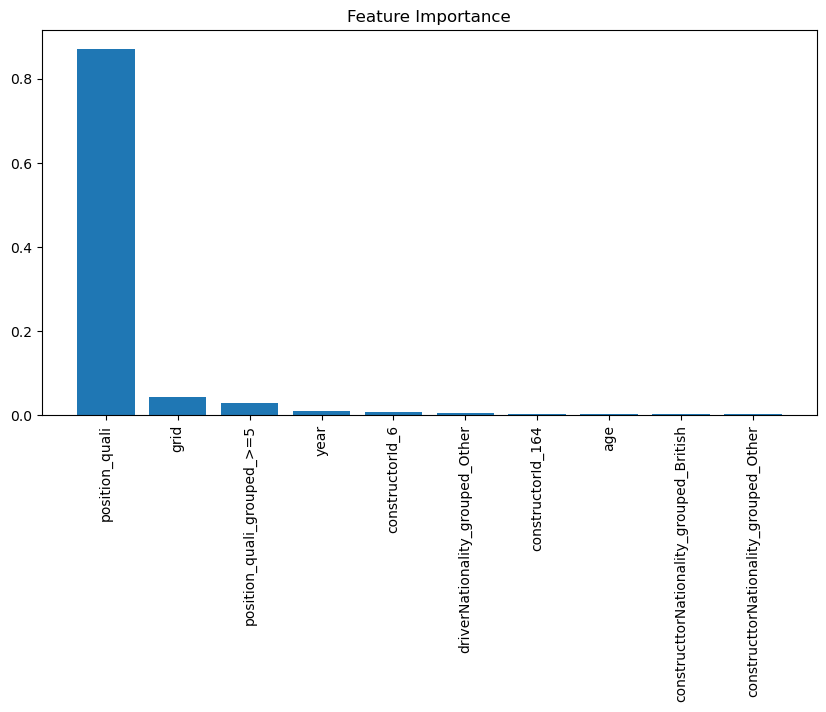

In [25]:
fi = best_model.feature_importances_
features = train_X.columns
## get index of features in descending order of importance
indices = np.argsort(fi)[::-1]
## get the names of the features in descending order of importance
names = [features[i] for i in indices]
## plot the 10 most important features
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(10), fi[indices[:10]])
plt.xticks(range(10), names[:10], rotation=90)
plt.show()



### KNN

In [41]:
params = {'n_neighbors':[i for i in range(1, 30)]
}
model = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy') #scoring could be the accuracy
model.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [42]:
model.best_params_

{'n_neighbors': 29}

In [43]:
best_knn = KNeighborsRegressor(n_neighbors=24)
best_knn.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=24)

In [44]:
pred_train = best_knn.predict(train_X)
pred_test = best_knn.predict(test_X)
pred_trainf = [round(x) for x in pred_train]
pred_testf = [round(x) for x in pred_test]
in_r2 = r2_score(train_y, pred_trainf)
out_r2 = r2_score(test_y, pred_testf)
print(in_r2, out_r2)

0.22994916030041757 0.1324611181168558


In [45]:
metrics2(test_y, pred_testf)

(0.9498861047835991,
 0.8496583143507973,
 0.6355353075170843,
 0.6355353075170843)

### SVM

In [46]:
from sklearn import svm

In [47]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(train_X, train_y)

SVC()

In [48]:
pred_train = clf.predict(train_X)
pred_test = clf.predict(test_X)
pred_trainf = [round(x) for x in pred_train]
pred_testf = [round(x) for x in pred_test]
in_r2 = r2_score(train_y, pred_trainf)
out_r2 = r2_score(test_y, pred_testf)
accuracy_score(test_y,pred_test)

0.11845102505694761

In [49]:
metrics2(test_y, pred_testf)

(0.9498861047835991,
 0.8496583143507973,
 0.4988610478359909,
 0.4988610478359909)